# Article Clustering

Will be drawing in part from _Content-driven, unsupervised clustering of news articles through multiscale graph partitioning_

### Load the things

In [1]:
import json

with open("../data/cache/as_vectors/doc_as_vectors.json", 'r') as in_file:
    as_vectors = json.load(in_file)

In [2]:
as_vectors

[[0.5,
  0.375,
  -0.625,
  -0.5,
  0.25,
  -0.5,
  0.0,
  -0.625,
  0.0,
  -0.25,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.25,
  0.125,
  0.75,
  0.125,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.5,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.75,
  0.0,
  -0.625,
  0.0,
  0.0,
  -0.625,
  0.0,
  -0.625,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.25,
  -0.25,
  0.0,
  0.0,
  -0.25,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.25,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.125,
  1.25,
  0.0,
  0.0,
  0.0,
  0.0,
  0.375,
  -0.25,
  -0.25,
  -0.25,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.125,
  0.0,
  0.0,
  -0.125,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.125,
  0.5,
  0.5,
  0.5,
  0.0,
  -0.625,
  -0.625,
  -0.625,
  0.5,
  -0.625,
  0.0,
  0.375,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
 

"We start by obtaining the pairwise cosine similarity for all pairs of articles. These distances form a similarity matrix, which can be thought of as a weighted adjacency matrix of a complete graph."

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

as_matrix = np.asarray(as_vectors)
sim_mat = cosine_similarity(as_matrix)
sim_mat = np.abs(sim_mat)
sim_mat.shape

(100, 100)

## NOTE: should we take abs of sim_matrix?

(plotting the similarity matrix, out of curiosity)

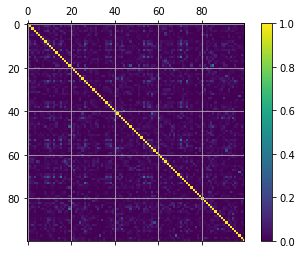

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
cax = ax.matshow(sim_mat, interpolation='nearest')
ax.grid(True)
fig.colorbar(cax)
fig.show()

### Similarity graph

Note that in the paper they use a fancier version called Knn-MST (minimum spanning tree) that's much better, before they run markov stability.

I will be using just knn first, and then later on try substituting the better version

We have to make an adjacency matrix

In [5]:
k = 13

adjacency_matrix = np.zeros(sim_mat.shape)

neighbor_indices = np.argsort(-sim_mat) # - makes it sort in descending
for i in range(0, sim_mat.shape[0]):
    for j in range(0, k):
        index = neighbor_indices[i][j]
        if sim_mat[i][index] > 0.0:
            adjacency_matrix[i][index] = 1

adjacency_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [22]:
import networkx as nx
#G = nx.from_numpy_matrix(adjacency_matrix)
G = nx.from_numpy_matrix(sim_mat)

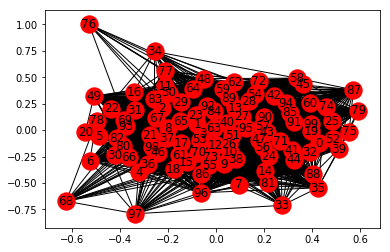

In [23]:
nx.draw_networkx(G)
plt.show()